In [172]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import colors
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

np.random.seed(1234)

In [173]:
# iris データを読み込んで諸元を表示してみる
iris = datasets.load_iris()

#
print(iris['DESCR'])

# データの各次元の意味
print(iris['feature_names'])

# 各クラスラベル
print(iris['target_names'])

# データを最初の10個分表示してみる
print(iris['data'][:10])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [174]:
# データをデータフレーム化しておこう

X_data = iris['data']

# 各クラスの名前リストを作っておこう
class_data = [iris['target_names'][cid] for cid in iris['target']]

df_Data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df_Class = pd.DataFrame(data=class_data, columns=['Class'])

# データフレームを結合しておく
df = pd.concat([df_Class, df_Data], axis=1)

# 3変数から

c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



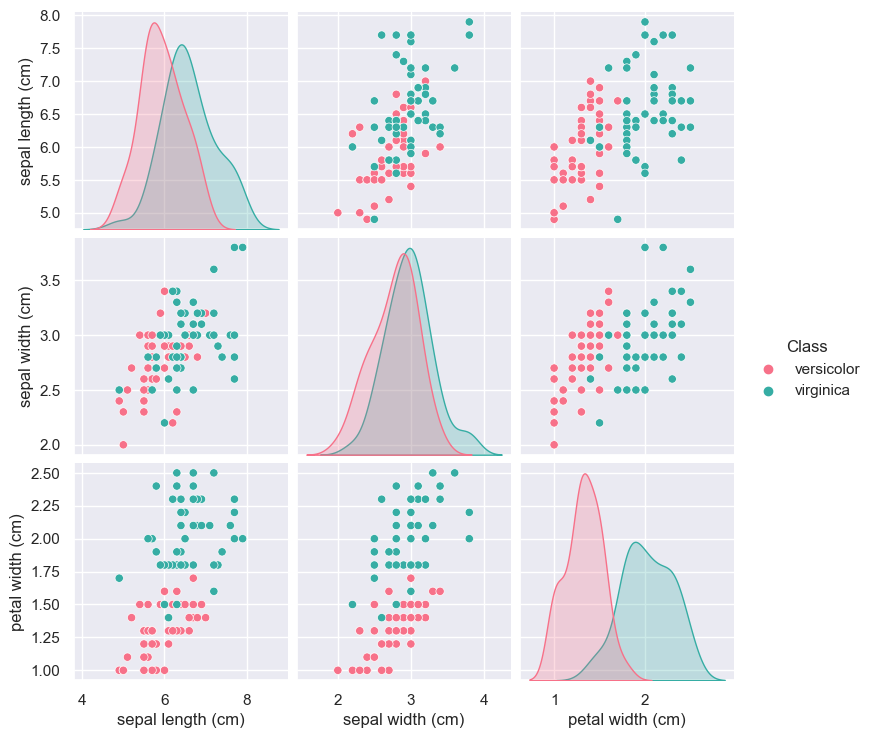

In [175]:
# sepal widthを追加
df_limited = df[df["Class"] != "setosa"].iloc[:, [0, 1, 2, 4]]

sns.pairplot(df_limited, hue="Class", palette="husl")

In [176]:
# 学習データと評価データを分ける
# 数値データを抽出
X = df_limited.iloc[:, 1:].values

# クラスラベルを数値化して ±1 ラベルを与える
y_dummy = pd.get_dummies(df_limited.iloc[:, 0]).values
y = 2 * y_dummy[:, 0].astype(int) - 1

# 学習データと評価データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

# データの形状を表示
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60, 3)
X_test shape: (40, 3)
y_train shape: (60,)
y_test shape: (40,)


In [177]:
import plotly.graph_objects as go

def draw_data_3d(X_train, y_train, X_test, y_test):
    '''
    3次元散布図を描画する関数
    '''
    fig = go.Figure()

    # 訓練データを描画
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train==1, 0], y=X_train[y_train==1, 1], z=X_train[y_train==1, 2],
        mode='markers', marker=dict(size=5, color='red'), name='Versicolor (Train)'
    ))
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train!=1, 0], y=X_train[y_train!=1, 1], z=X_train[y_train!=1, 2],
        mode='markers', marker=dict(size=5, color='blue'), name='Virginica (Train)'
    ))

    # テストデータを描画
    fig.add_trace(go.Scatter3d(
        x=X_test[y_test==1, 0], y=X_test[y_test==1, 1], z=X_test[y_test==1, 2],
        mode='markers', marker=dict(size=5, color='red', symbol='diamond'), name='Versicolor (Test)'
    ))
    fig.add_trace(go.Scatter3d(
        x=X_test[y_test!=1, 0], y=X_test[y_test==1, 1], z=X_test[y_test==1, 2],
        mode='markers', marker=dict(size=5, color='blue', symbol='diamond'), name='Virginica (Test)'
    ))

    # ラベルとタイトル
    fig.update_layout(scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Petal Width (cm)'
    ), title='3D Scatter Plot of Iris Data')

    return fig


fig=draw_data_3d(X_train, y_train, X_test, y_test)
fig.show()

In [178]:
X_Center = X_train.mean(axis=0)
X_train = (X_train - X_Center) 

print('学習データの幅（補正後）', X_train.max(axis=0) - X_train.min(axis=0))
print('学習データの中心（補正後）', X_train.mean(axis=0))

# テストデータの方も補正しておこう

X_test = (X_test - X_Center) 

print('評価データの幅（補正後）', X_test.max(axis=0) - X_test.min(axis=0))
print('評価データの中心（補正後）', X_test.mean(axis=0))

学習データの幅（補正後） [2.7 1.6 1.5]
学習データの中心（補正後） [ 7.10542736e-16 -1.22124533e-15  5.69914486e-16]
評価データの幅（補正後） [3.  1.8 1.5]
評価データの中心（補正後） [0.08416667 0.03       0.19      ]


In [179]:
fig=draw_data_3d(X_train, y_train, X_test, y_test)
fig.show()

In [180]:
def draw_boundary_3d(w, x_range, y_range):
    '''
    3次元散布図を描画し、境界面を追加する関数
    '''
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 50),
                     np.linspace(y_range[0], y_range[1], 50))
    zz = -(w[0] + w[1] * xx + w[2] * yy) / w[3]

    fig = go.Figure()

    # 訓練データを描画
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train==1, 0], y=X_train[y_train==1, 1], z=X_train[y_train==1, 2],
        mode='markers', marker=dict(size=2, color='red'), name='Versicolor (Train)'
    ))
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train!=1, 0], y=X_train[y_train!=1, 1], z=X_train[y_train!=1, 2],
        mode='markers', marker=dict(size=2, color='blue'), name='Virginica (Train)'
    ))

    # テストデータを描画
    fig.add_trace(go.Scatter3d(
        x=X_test[y_test==1, 0], y=X_test[y_test==1, 1], z=X_test[y_test==1, 2],
        mode='markers', marker=dict(size=2, color='red', symbol='diamond'), name='Versicolor (Test)'
    ))
    fig.add_trace(go.Scatter3d(
        x=X_test[y_test!=1, 0], y=X_test[y_test==1, 1], z=X_test[y_test==1, 2],
        mode='markers', marker=dict(size=2, color='blue', symbol='diamond'), name='Virginica (Test)'
    ))

    # 境界面を追加
    fig.add_trace(go.Mesh3d(
        x=xx.flatten(), y=yy.flatten(), z=zz.flatten(), color='green', opacity=0.3, name='Decision Boundary'
    ))

    # ラベルとタイトル
    fig.update_layout(scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Petal Width (cm)'
    ), title='3D Scatter Plot with Decision Boundary')

    return fig

## LDA

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# あとはお作法に従って
classifier = LDA()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 実質２行くらい
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

誤り個数 1


In [182]:
# 重みとバイアスを取得
w = np.hstack([classifier.intercept_, classifier.coef_[0]])
print(w)


# 判別面の描画
#x_range = (X[:, 0].min()-1, X[:, 0].max()+1)
##y_range = (X[:, 1].min()-1, X[:, 1].max()+1)
#z_range=(X[:, 2].min()-1, X[:, 2].max()+1)

x_range = (-2,2)
y_range = (-2,2)


fig=draw_boundary_3d(w, x_range, y_range)
fig.show()

[  1.60990508  -1.1943549    8.31090666 -18.65240486]


## logistic

In [183]:
from sklearn.linear_model import LogisticRegression

# sklearn のロジスティック回帰は L2 正則化が入っていて，これの効きの大きさの逆数をパラメータCで与える
classifier = LogisticRegression(C=1000)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

誤り個数 2


In [184]:
# で，結果は 
# classifier.coef_, に，重み情報
# classifier.intercept_ に切片情報が入る．
# 
w = np.array([classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1],classifier.coef_[0][2]])

print(w / np.sqrt(w @ w))

x_range = (-2,2)
y_range = (-2,2)


fig=draw_boundary_3d(w, x_range, y_range)
fig.show()

[ 0.03882676 -0.07666506  0.31194204 -0.9462067 ]


# 4変数

In [185]:
# データをデータフレーム化しておこう

X_data = iris['data']

# 各クラスの名前リストを作っておこう
class_data = [iris['target_names'][cid] for cid in iris['target']]

df_Data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df_Class = pd.DataFrame(data=class_data, columns=['Class'])

# データフレームを結合しておく
df = pd.concat([df_Class, df_Data], axis=1)

In [186]:
# sepal widthを追加
df_limited = df[df["Class"] != "setosa"].iloc[:, [0, 1, 2, 3,4]]

#sns.pairplot(df_limited, hue="Class", palette="husl")

In [187]:
# 学習データと評価データを分ける
# 数値データを抽出
X = df_limited.iloc[:, 1:].values

# クラスラベルを数値化して ±1 ラベルを与える
y_dummy = pd.get_dummies(df_limited.iloc[:, 0]).values
y = 2 * y_dummy[:, 0].astype(int) - 1

# 学習データと評価データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

# データの形状を表示
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60, 4)
X_test shape: (40, 4)
y_train shape: (60,)
y_test shape: (40,)


In [188]:
X_Center = X_train.mean(axis=0)
X_train = (X_train - X_Center) 

print('学習データの幅（補正後）', X_train.max(axis=0) - X_train.min(axis=0))
print('学習データの中心（補正後）', X_train.mean(axis=0))

# テストデータの方も補正しておこう

X_test = (X_test - X_Center) 

print('評価データの幅（補正後）', X_test.max(axis=0) - X_test.min(axis=0))
print('評価データの中心（補正後）', X_test.mean(axis=0))

学習データの幅（補正後） [2.7 1.6 3.4 1.5]
学習データの中心（補正後） [ 7.10542736e-16 -1.22124533e-15 -1.08061708e-15  5.69914486e-16]
評価データの幅（補正後） [3.  1.8 3.9 1.5]
評価データの中心（補正後） [0.08416667 0.03       0.3025     0.19      ]


## LDA

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# あとはお作法に従って
classifier = LDA()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 実質２行くらい
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

誤り個数 1


## logistic

In [190]:
from sklearn.linear_model import LogisticRegression

# sklearn のロジスティック回帰は L2 正則化が入っていて，これの効きの大きさの逆数をパラメータCで与える
classifier = LogisticRegression(C=1000)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

誤り個数 4
